In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima_model import ARMA
import sklearn.metrics as skmetrics
import warnings
from statsmodels.tsa.stattools import arma_order_select_ic
from tqdm import tqdm #A tqdm progress bar shows you how much time has elapsed and the estimated time remaining for the iterable
import pmdarima as pm
warnings.filterwarnings("ignore")

In [101]:
series = pd.read_csv('zillow-carlifornia.csv',header=0, index_col=0, parse_dates=True, squeeze=True)
series.shape

(107, 3)

In [102]:
series.head()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate
Date,,,
2008-02-29,470000.0,5.29,6.3
2008-03-31,441000.0,5.44,6.2
2008-04-30,460000.0,5.42,6.4
2008-05-31,429000.0,5.47,6.3
2008-06-30,437500.0,5.60,6.2


In [103]:
series.tail()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate
Date,,,
2016-08-31,NaN,3.46,4.8
2016-09-30,NaN,3.42,5.0
2016-10-31,NaN,3.36,5.0
2016-11-30,NaN,3.47,4.8
2016-12-31,NaN,4.07,4.7


In [104]:
series['MedianSoldPrice_AllHomes.California']

Date
2008-02-29    470000.0
2008-03-31    441000.0
2008-04-30    460000.0
2008-05-31    429000.0
2008-06-30    437500.0
                ...   
2016-08-31         NaN
2016-09-30         NaN
2016-10-31         NaN
2016-11-30         NaN
2016-12-31         NaN
Name: MedianSoldPrice_AllHomes.California, Length: 107, dtype: float64

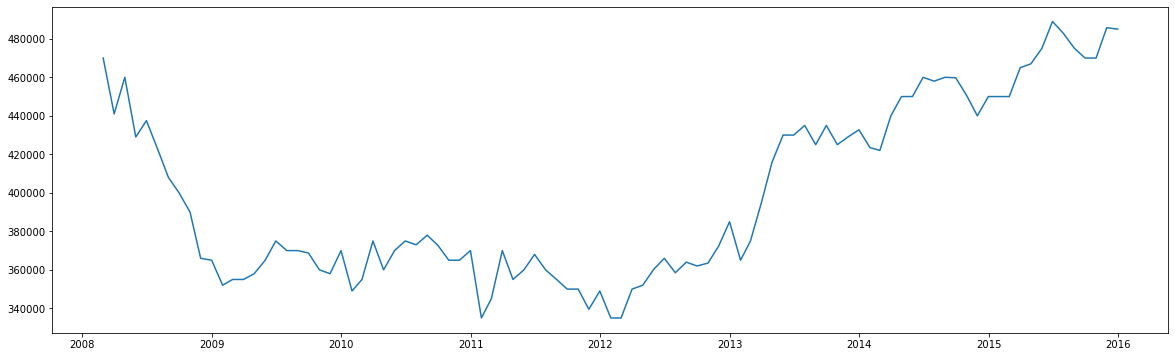

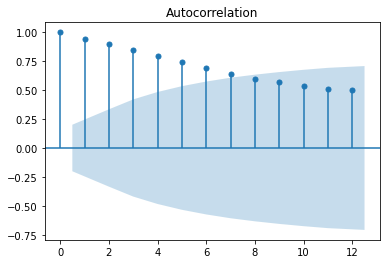

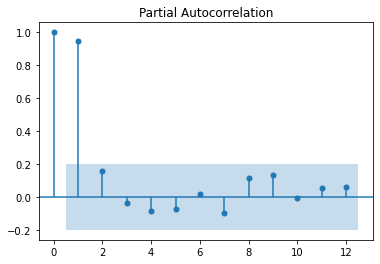

In [105]:
data = series['MedianSoldPrice_AllHomes.California'].dropna()
x=np.array(data)
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
ax.plot(data)
plt.show()
plot_acf(data,lags=12) 
plt.show()
plot_pacf(data,lags=12) 
plt.show()

In [93]:
# trend and seasonal differencing
def diff(data, interval=1):
    diff = list()
    for i in range(interval, len(data)):
        value = data[i] - data[i - interval]
        diff.append(value)
    return diff

In [86]:
def adf_test(timeseries):
    #Perform Augmented Dickey-Fuller test:
    print ('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

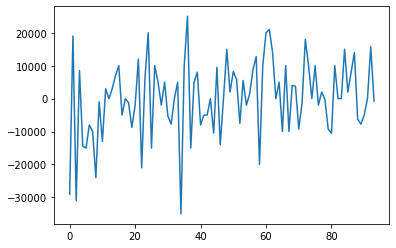

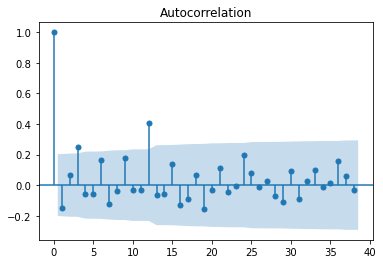

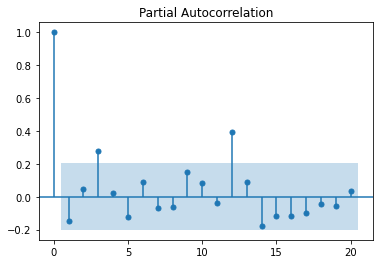

In [107]:
# fit a trend only model 
# determine d
d1 = diff(data, 1)
plt.plot(d1)
plot_acf(d1,lags=38) 
plt.show()
plot_pacf(d1,lags=20) 
plt.show()

In [108]:
dftest = adfuller(d1)
dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
print (dfoutput)

Test Statistic   -3.088139
p-value           0.027443
dtype: float64


# SARIMAX

In [124]:
series

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate
Date,,,
2008-02-29,470000.0,5.29,6.3
2008-03-31,441000.0,5.44,6.2
2008-04-30,460000.0,5.42,6.4
2008-05-31,429000.0,5.47,6.3
2008-06-30,437500.0,5.60,6.2
...,...,...,...
2016-08-31,NaN,3.46,4.8
2016-09-30,NaN,3.42,5.0
2016-10-31,NaN,3.36,5.0


In [130]:
dt = series.dropna()

In [131]:
dt

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate
Date,,,
2008-02-29,470000.0,5.29,6.3
2008-03-31,441000.0,5.44,6.2
2008-04-30,460000.0,5.42,6.4
2008-05-31,429000.0,5.47,6.3
2008-06-30,437500.0,5.60,6.2
...,...,...,...
2015-08-31,475000.0,3.95,5.2
2015-09-30,470000.0,3.87,5.1
2015-10-31,470000.0,3.80,5.0


In [144]:
#sarimax 

#drop na and normalize the features X for better prediction
#you can use StandardScaler too
#train and test
period = 12
train, test = dt[0:-period], dt[-period:]

#scale data

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [145]:
#auto sarimax search without seasonality
from pmdarima.arima import auto_arima
model=auto_arima(train_sc[:,0], # gdp as endogenous
                 exogenous= train_sc[:,1:], # rest as exogenous
                 start_p=0, start_q=0, 
                 max_p=4, max_q=4, 
                 max_d=2,
                 m=4, D=1, max_P=3, max_Q=3,
                 trace=True,
                 error_action='ignore', 
                 suppress_warnings=True,information_criterion='oob', n_jobs = -1)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[4] intercept   : AIC=-62.237, Time=0.15 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=-52.826, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=-122.010, Time=0.16 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=-93.178, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=-54.755, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=-110.813, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[4] intercept   : AIC=-162.325, Time=0.23 sec
 ARIMA(1,0,0)(3,1,0)[4] intercept   : AIC=-161.377, Time=0.32 sec
 ARIMA(1,0,0)(2,1,1)[4] intercept   : AIC=-161.841, Time=0.27 sec
 ARIMA(1,0,0)(1,1,1)[4] intercept   : AIC=-142.014, Time=0.20 sec
 ARIMA(1,0,0)(3,1,1)[4] intercept   : AIC=-158.855, Time=0.36 sec
 ARIMA(0,0,0)(2,1,0)[4] intercept   : AIC=-52.275, Time=0.08 sec
 ARIMA(2,0,0)(2,1,0)[4] intercept   : AIC=-164.945, Time=0.25 sec
 ARIMA(2,0,0)(1,1,0)[4] intercept   : AIC=-122.057, Time=0.20 sec
 ARIMA(2,0,0)(3,1,0)[4] intercept   : 

In [146]:
y_pred = model.predict(n_periods=len(test_sc),X=test_sc[:,1:]).reshape(-1,1)
y_pred_ = np.repeat(y_pred,3,axis=1) # duplicate the pred column x3 times to fit the scaler's shape
y_pred_inv = sc.inverse_transform(y_pred_)[:,0]# inverset the pred and take the first column

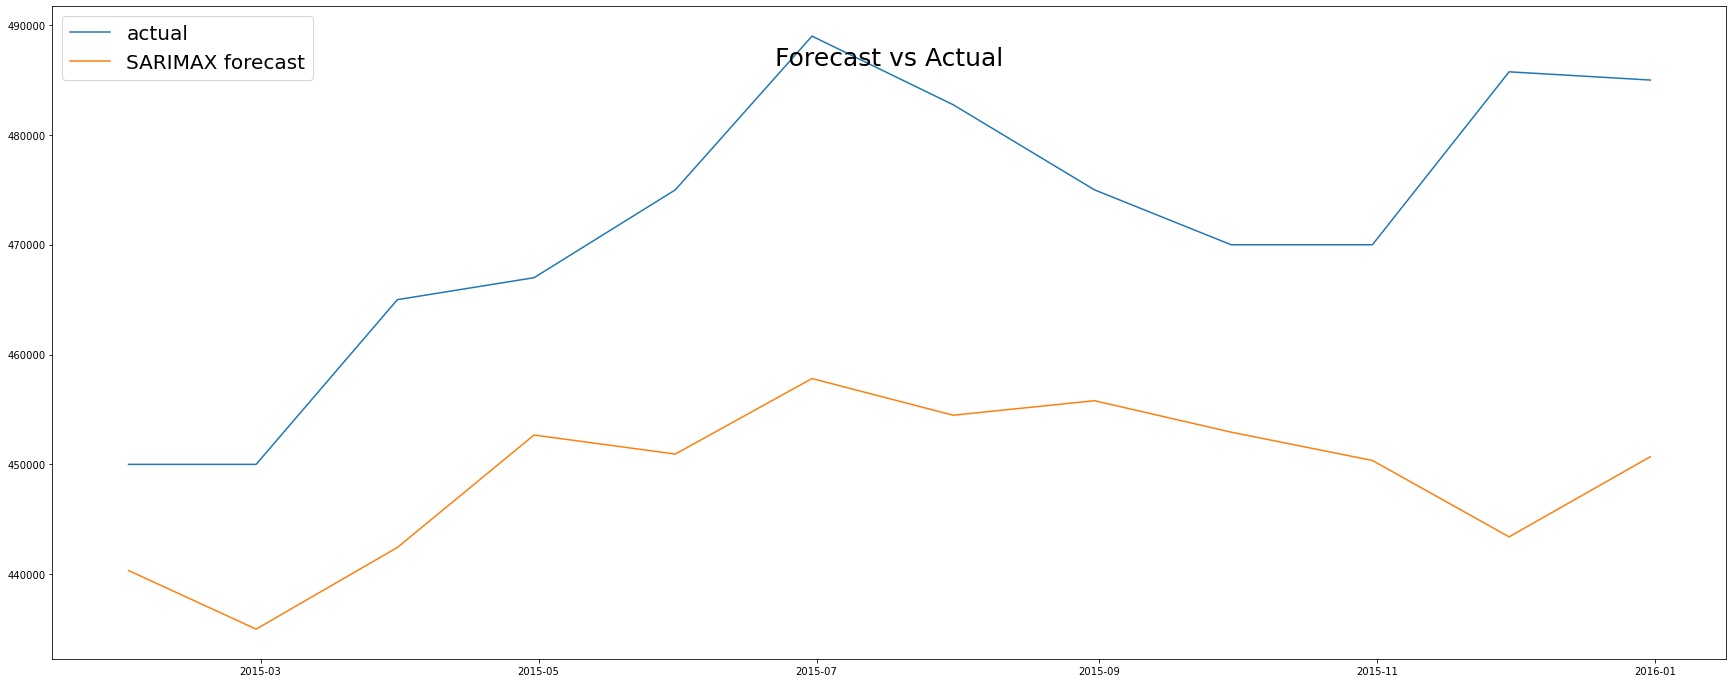

In [167]:
y_pred_series = pd.Series(y_pred_inv,index=test.index)
plt.figure(figsize=(30, 12))

plt.plot(test['MedianSoldPrice_AllHomes.California'], label='actual')
plt.plot(y_pred_series, label='SARIMAX forecast')
plt.legend(loc='upper left', fontsize=20)
plt.title('Forecast vs Actual', fontsize = 25, y = 0.9)
plt.show()

In [148]:
mape_test_sarimax=(np.abs(np.array(test['MedianSoldPrice_AllHomes.California'])-np.array(y_pred_inv))/np.array(test['MedianSoldPrice_AllHomes.California'])).mean()

0.048623556615757346


In [157]:
from sklearn import metrics

In [168]:
rmse = np.sqrt(metrics.mean_squared_error(np.array(test['MedianSoldPrice_AllHomes.California'])-np.array(y_pred_inv),np.array(y_pred)))

In [169]:
print(mape_test_sarimax, rmse)

0.048623556615757346 24832.302835450046
